In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prepare_zillow import wrangle_zillow
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
import warnings
warnings.filterwarnings("ignore")
# Wrangling
from sklearn.model_selection import train_test_split
from env import host, user, password
import acquire_zillow
from functions import split, scaled_data 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
df = acquire_zillow.get_zillow_data()
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,...,"60,590,630,072,012.00",0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,...,"61,110,010,023,006.00",0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,...,"60,590,218,022,012.00",0.01,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,...,"60,373,001,001,006.00",-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,...,"60,374,608,001,014.00",-0.00,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


In [4]:
df = wrangle_zillow(df)
df.head()

,parcelid,bathroom,bedroom,bed_bath,sqft,finished_sqft,fips,fullbathcnt,garage,hashottuborspa,...,age_bin,acres,acres_bin,dollar_per_sqft,cola,county,has_pool,garage,county_Orange,county_Ventura
0,14297519,3.50,4.00,3.50,"3,100.00","3,100.00",6059,3.00,2.00,0.00,...,10-20,0.10,0.10,156.68,0,Orange,0.00,2.00,1,0
1,17052889,1.00,2.00,1.00,"1,465.00","1,465.00",6111,1.00,1.00,0.00,...,40-50,0.29,0.30,60.07,0,Ventura,0.00,1.00,0,1
2,14186244,2.00,3.00,2.00,"1,243.00","1,243.00",6059,2.00,2.00,0.00,...,50-60,0.19,0.20,68.62,0,Orange,1.00,2.00,1,0
3,12177905,3.00,4.00,3.00,"2,376.00","2,376.00",6037,3.00,0.00,0.00,...,40-50,0.30,0.30,45.84,0,LA,1.00,0.00,0,0
4,12095076,3.00,4.00,3.00,"2,962.00","2,962.00",6037,3.00,0.00,0.00,...,60-70,1.45,0.50,93.41,0,LA,1.00,0.00,0,0


In [ ]:
df.columns

In [ ]:
df.head()

In [5]:
df_new = df.drop(columns = ['parcelid', 'tax_amount', 'sqft', 'year_built', 'fips', 'bed_bath', 'propertycountylandusecode', 'county', 'age_bin',
                                       'lot_size', 'regionidzip', 'property_desc', 'rawcensustractandblock', 'regionidcity',
                                       'structuretaxvaluedollarcnt', 'censustractandblock', 'transaction_date', 'roomcnt', 'hashottuborspa', 'assessment_year', 'propertylandusetypeid', 'fullbathcnt']) 



In [6]:
df_new.fillna(value = 0,
          inplace = True)

In [7]:
# split data
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(df_new, stratify_by='logerror')

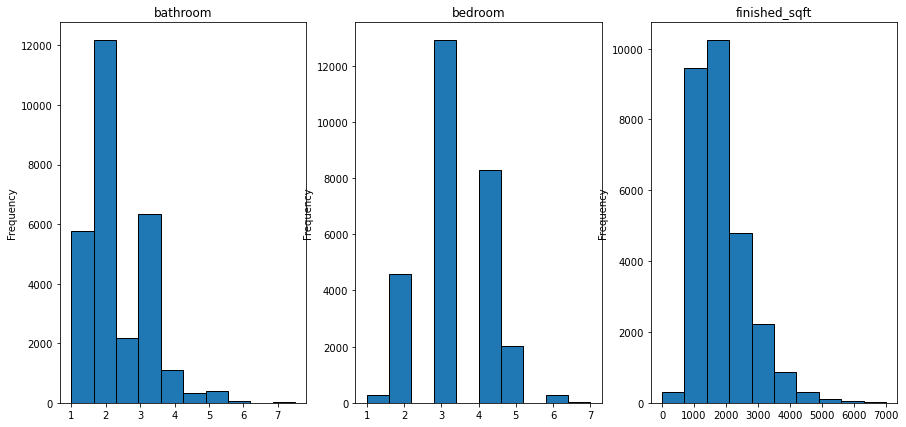

In [8]:
trafig, axs = plt.subplots(1, 3, figsize=(15, 7))

for ax, col in zip(axs, train.select_dtypes('number')):
    train[col].plot.hist(ax=ax, title=col, ec='black')

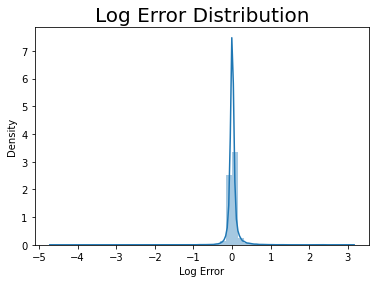

In [9]:
import seaborn as sns
# overall logerror distribution 
sns.distplot(train.logerror)
plt.title('Log Error Distribution', fontsize=20)
plt.xlabel('Log Error')

plt.show()

log error looks normally distributed 

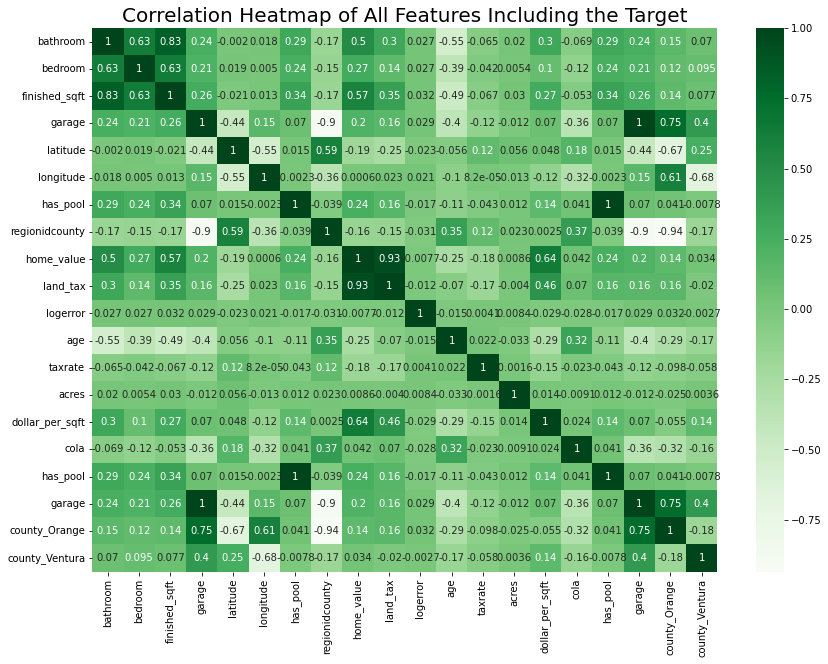

In [10]:

plt.figure(figsize=(14, 10))
sns.heatmap(train.corr(), cmap='Greens', annot=True)
plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20)
plt.show()

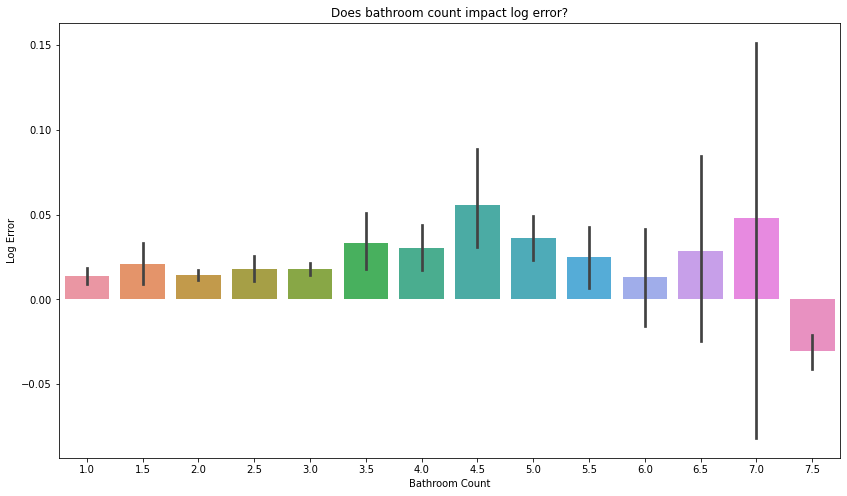

In [11]:
plt.figure(figsize=(14,8))
with sns.color_palette('Blues'):
    sns.barplot(x='bathroom', y='logerror', data=train)
plt.xlabel('Bathroom Count')
plt.ylabel('Log Error')
plt.title('Does bathroom count impact log error?')
plt.show()

homes with smaller bathroom count tend to have smaller log error and bigger errors for 7.5 bathrooms 

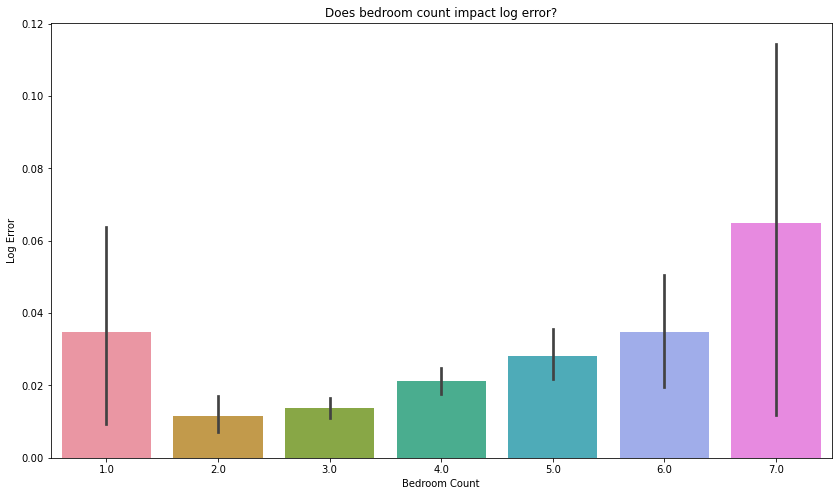

In [12]:
plt.figure(figsize=(14,8))
with sns.color_palette("Blues"):
    sns.barplot(x='bedroom', y='logerror', data=train)
plt.xlabel('Bedroom Count')
plt.ylabel('Log Error')
plt.title('Does bedroom count impact log error?')
plt.show()

bedroom shows an increase in log error at higher counts 

In [ ]:
train.head()

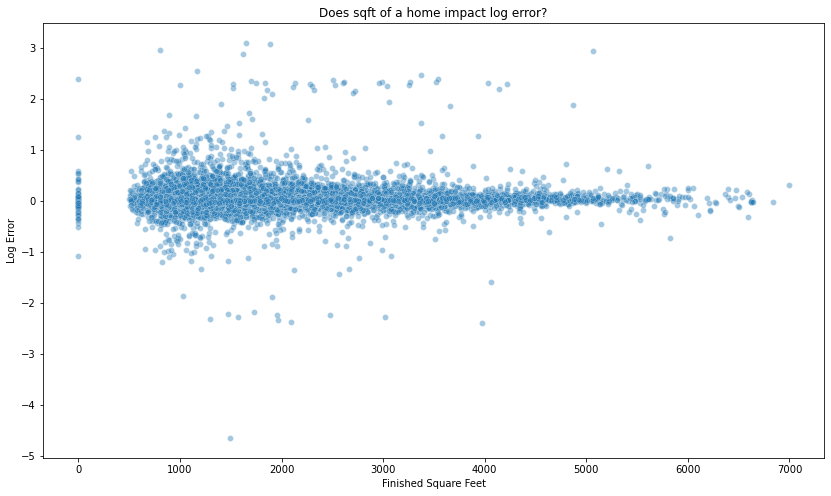

In [13]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='finished_sqft', y='logerror', data=train, alpha=.4)
plt.xlabel('Finished Square Feet')
plt.ylabel('Log Error')
plt.title('Does sqft of a home impact log error?')
plt.show()

In [ ]:
train.head()

Text(0.5, 1.0, 'Logerror vs Home Value')

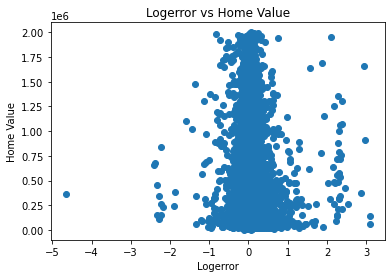

In [14]:
plt.scatter(train.logerror,train.home_value)
plt.xlabel('Logerror')
plt.ylabel('Home Value')
plt.title('Logerror vs Home Value')

Home value and logerror do not have a linear corrilation,  but they do have some relationship

In [ ]:
train.head()

In [ ]:
sns.barplot(x='county', y='age', data=train)

In [ ]:
# 𝐻0 : Bedroom and bathroom count are not related
# 𝐻𝑎 : Bedroom and bathroom count are related

x = train.bedroom
y = train.bathroom
alpha = 0.05
alternative_hypothesis = 'bedroom count is related to bathroom count'

corr, p = stats.pearsonr(x, y)

corr, p

if p < alpha:
    print("We reject the null hypothesis")
    print("We can say that", alternative_hypothesis)
else:
    print("We fail to reject the null")

In [ ]:
# 𝐻0 : Overall home value has no effect on logerror
# 𝐻𝑎 : Over home value does have an effect on logerror

x = train.home_value
y = train.logerror

alternative_hypothesis = 'house value is related to logerror'

corr, p = stats.pearsonr(x, y)

corr, p

if p < alpha:
    print("We reject the null hypothesis")
    print("We can say that", alternative_hypothesis)
else:
    print("We fail to reject the null")
    
p

In [ ]:
sns.set_palette("rocket")
sns.pairplot(train[['logerror', 'age']]) 

In [15]:
#𝐻0 :Properties in each city have the same log error.
#𝐻𝑎 : Properties in the City of Los Angeles have a higher log error.

alpha = 0.05

x = train[train.cola == 1].logerror
y = train[train.cola != 1].logerror

null_hypothesis = "There is no correlation between city and log error."

t, p= stats.ttest_ind(x, y)

if p >  alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that There is no correlation between city and log error.


In [16]:
# 𝐻0 : There is no difference in median log error in properties built in different years
# 𝐻𝑎 : Property age affects median log error
x = train.age
y = train.logerror

r, p = stats.pearsonr(x,y)


if p < alpha:
    print("We reject the null hypothesis that there is no difference in log error based on a home's age.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis that there is no difference in log error based on a home's age.


Text(0.5, 0, 'Age of Home')

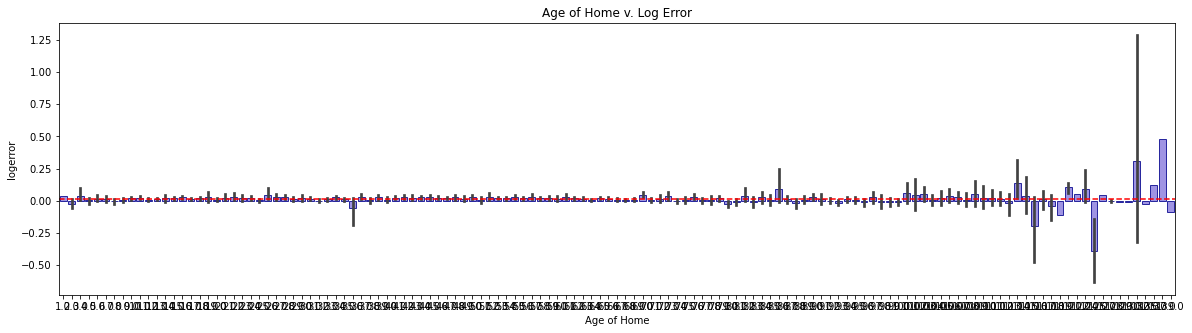

In [19]:
plt.figure(figsize=(20,5))
sns.barplot(train. age, train.logerror, data=train, alpha=.8, color='mediumslateblue', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Age of Home v. Log Error')
plt.xlabel("Age of Home")

Text(0.5, 1.0, 'Acres v. Log Error')

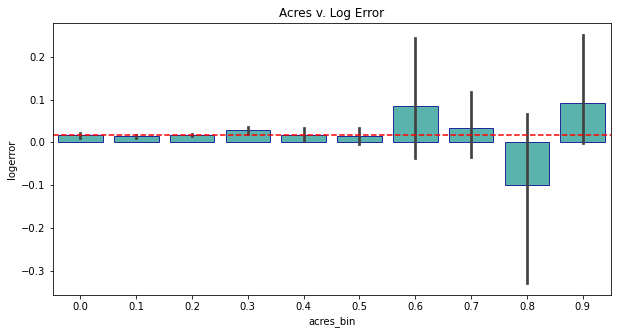

In [20]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.acres_bin, train.logerror, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Acres v. Log Error')

In [18]:
train.head()

,bathroom,bedroom,finished_sqft,garage,latitude,longitude,has_pool,regionidcounty,home_value,land_tax,...,age,taxrate,acres,acres_bin,dollar_per_sqft,cola,has_pool,garage,county_Orange,county_Ventura
31661,3.00,4.00,"2,250.00",0.00,34.54,-118.04,0.00,"3,101.00","242,000.00","60,400.00",...,11.00,2.02,0.16,0.20,80.71,0,0.00,0.00,0,0
47100,2.00,3.00,"1,399.00",0.00,33.93,-118.05,0.00,"3,101.00","322,470.00","250,800.00",...,39.00,1.27,0.16,0.20,51.23,0,0.00,0.00,0,0
45435,2.00,3.00,"2,120.00",0.00,33.79,-118.37,1.00,"3,101.00","1,028,000.00","822,000.00",...,61.00,1.15,0.25,0.30,97.17,0,1.00,0.00,0,0
10809,3.00,4.00,"1,781.00",2.00,34.27,-118.76,0.00,"2,061.00","459,000.00","228,000.00",...,47.00,1.17,0.11,0.10,129.70,0,0.00,2.00,0,1
2565,3.00,4.00,"2,088.00",0.00,34.11,-118.33,0.00,"3,101.00","1,168,000.00","867,000.00",...,60.00,1.21,0.13,0.10,144.16,1,0.00,0.00,0,0


scaling

In [ ]:
train.head()

In [ ]:
X_validate.head()

In [ ]:
train.head()

In [22]:
# scale the data

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [23]:
X_train_scaled.head()

,bathroom,bedroom,finished_sqft,garage,latitude,longitude,has_pool,regionidcounty,home_value,land_tax,age,taxrate,acres,acres_bin,dollar_per_sqft,cola,has_pool,garage,county_Orange,county_Ventura
0,0.31,0.50,0.32,0.00,0.81,0.75,0.00,1.00,0.12,0.03,0.07,0.02,0.00,0.22,0.07,0.00,0.00,0.00,0.00,0.00
1,0.15,0.33,0.20,0.00,0.40,0.74,0.00,1.00,0.16,0.14,0.28,0.02,0.00,0.22,0.04,0.00,0.00,0.00,0.00,0.00
2,0.15,0.33,0.30,0.00,0.30,0.58,1.00,1.00,0.51,0.44,0.43,0.01,0.00,0.33,0.08,0.00,1.00,0.00,0.00,0.00
3,0.31,0.50,0.25,0.14,0.63,0.37,0.00,0.43,0.23,0.12,0.33,0.01,0.00,0.11,0.11,0.00,0.00,0.14,0.00,1.00
4,0.31,0.50,0.30,0.00,0.52,0.60,0.00,1.00,0.58,0.47,0.43,0.01,0.00,0.11,0.12,1.00,0.00,0.00,0.00,0.00


## Clustering 

First Cluster all columns

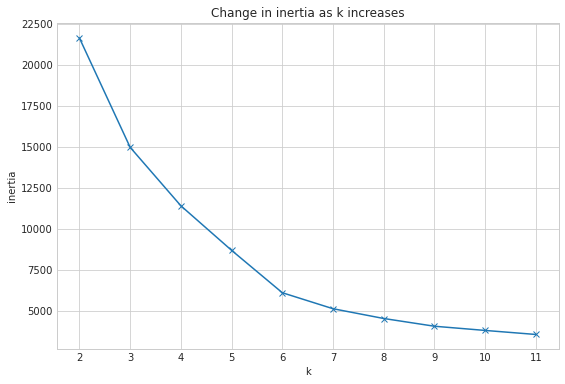

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3 and 6 for K

In [25]:
X = X_train_scaled

# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X)

# use the thing
X_train_scaled["cluster_all"] = kmeans.predict(X)
X_validate_scaled['cluster_all'] = kmeans.predict(X_validate_scaled)
X_test['cluster_all'] = kmeans.predict(X_test)

In [27]:
X.head()

,bathroom,bedroom,finished_sqft,garage,latitude,longitude,has_pool,regionidcounty,home_value,land_tax,...,taxrate,acres,acres_bin,dollar_per_sqft,cola,has_pool,garage,county_Orange,county_Ventura,cluster_all
0,0.31,0.50,0.32,0.00,0.81,0.75,0.00,1.00,0.12,0.03,...,0.02,0.00,0.22,0.07,0.00,0.00,0.00,0.00,0.00,0
1,0.15,0.33,0.20,0.00,0.40,0.74,0.00,1.00,0.16,0.14,...,0.02,0.00,0.22,0.04,0.00,0.00,0.00,0.00,0.00,0
2,0.15,0.33,0.30,0.00,0.30,0.58,1.00,1.00,0.51,0.44,...,0.01,0.00,0.33,0.08,0.00,1.00,0.00,0.00,0.00,2
3,0.31,0.50,0.25,0.14,0.63,0.37,0.00,0.43,0.23,0.12,...,0.01,0.00,0.11,0.11,0.00,0.00,0.14,0.00,1.00,0
4,0.31,0.50,0.30,0.00,0.52,0.60,0.00,1.00,0.58,0.47,...,0.01,0.00,0.11,0.12,1.00,0.00,0.00,0.00,0.00,0


In [ ]:
sns.scatterplot(x=X.latitude, y=y_train.logerror, hue=(X.cluster_all))

Cluster groups by physical position and home features

-Latitude

-Longitude

-Acres

-Sqft

-Cola

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

I will be using 3 for K

In [ ]:
X1 = X_train_scaled[['latitude', 'longitude', 'cola', 'acres_bin', 'finished_sqft']]
X2 = X_validate_scaled[['latitude', 'longitude', 'cola', 'acres_bin', 'finished_sqft']]
# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

In [ ]:
X_train_scaled['cluster_location'] = kmeans.predict(X1)
X_validate_scaled['cluster_location'] = kmeans.predict(X2)

In [ ]:
X.head()

In [ ]:
sns.relplot(x="longitude", y="latitude", hue="cluster_location", data=X_train_scaled)

## Cluster on age, acres, dollar_per_sqft

In [ ]:
X1 = X_train_scaled[['age', 'acres_bin', 'dollar_per_sqft']]
X2 = X_validate_scaled[['age', 'acres_bin', 'dollar_per_sqft']]

# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

In [ ]:
X_train_scaled['cluster_age'] = kmeans.predict(X1)
X_validate_scaled['cluster_age'] = kmeans.predict(X2)

In [ ]:
sns.scatterplot(x=X.acres_bin, y=y_train.logerror, hue=(X.cluster_age))

In [28]:
train.head()

,bathroom,bedroom,finished_sqft,garage,latitude,longitude,has_pool,regionidcounty,home_value,land_tax,...,age,taxrate,acres,acres_bin,dollar_per_sqft,cola,has_pool,garage,county_Orange,county_Ventura
31661,3.00,4.00,"2,250.00",0.00,34.54,-118.04,0.00,"3,101.00","242,000.00","60,400.00",...,11.00,2.02,0.16,0.20,80.71,0,0.00,0.00,0,0
47100,2.00,3.00,"1,399.00",0.00,33.93,-118.05,0.00,"3,101.00","322,470.00","250,800.00",...,39.00,1.27,0.16,0.20,51.23,0,0.00,0.00,0,0
45435,2.00,3.00,"2,120.00",0.00,33.79,-118.37,1.00,"3,101.00","1,028,000.00","822,000.00",...,61.00,1.15,0.25,0.30,97.17,0,1.00,0.00,0,0
10809,3.00,4.00,"1,781.00",2.00,34.27,-118.76,0.00,"2,061.00","459,000.00","228,000.00",...,47.00,1.17,0.11,0.10,129.70,0,0.00,2.00,0,1
2565,3.00,4.00,"2,088.00",0.00,34.11,-118.33,0.00,"3,101.00","1,168,000.00","867,000.00",...,60.00,1.21,0.13,0.10,144.16,1,0.00,0.00,0,0


In [30]:
X1 = X_train[['home_value', 'land_tax', 'taxrate']]
X2 = X_validate[['home_value', 'land_tax', 'taxrate']]
X3 = X_test[['home_value', 'land_tax', 'taxrate']]

# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([1, 1, 0, ..., 2, 1, 1], dtype=int32)

In [31]:

X_train['cluster_tax'] = kmeans.predict(X1)
X_validate['cluster_tax'] = kmeans.predict(X2)
X_test['cluster_tax'] = kmeans.predict(X3)

In [32]:
X_train.head()

,bathroom,bedroom,finished_sqft,garage,latitude,longitude,has_pool,regionidcounty,home_value,land_tax,...,taxrate,acres,acres_bin,dollar_per_sqft,cola,has_pool,garage,county_Orange,county_Ventura,cluster_tax
31661,3.00,4.00,"2,250.00",0.00,34.54,-118.04,0.00,"3,101.00","242,000.00","60,400.00",...,2.02,0.16,0.20,80.71,0,0.00,0.00,0,0,1
47100,2.00,3.00,"1,399.00",0.00,33.93,-118.05,0.00,"3,101.00","322,470.00","250,800.00",...,1.27,0.16,0.20,51.23,0,0.00,0.00,0,0,1
45435,2.00,3.00,"2,120.00",0.00,33.79,-118.37,1.00,"3,101.00","1,028,000.00","822,000.00",...,1.15,0.25,0.30,97.17,0,1.00,0.00,0,0,0
10809,3.00,4.00,"1,781.00",2.00,34.27,-118.76,0.00,"2,061.00","459,000.00","228,000.00",...,1.17,0.11,0.10,129.70,0,0.00,2.00,0,1,2
2565,3.00,4.00,"2,088.00",0.00,34.11,-118.33,0.00,"3,101.00","1,168,000.00","867,000.00",...,1.21,0.13,0.10,144.16,1,0.00,0.00,0,0,0


## Modeling

In [ ]:
X_train_features1 = X_train_scaled[['cluster_all']]
X_train_features2 = X_train_scaled[['cluster_location']]
X_train_features3 = X_train_scaled[['cluster_age']]

X_validate_features1 = X_validate_scaled[['cluster_all']]
X_validate_features2 = X_validate_scaled[['cluster_location']]
X_validate_features3 = X_validate_scaled[['cluster_age']]

#X_test_features1 = X_test_scaled[['cluster_all']]
#X_test_features2 = X_test_scaled[['cluster_location']]
#X_test_features3 = X_test_scaled[['cluster_age']]

In [ ]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test= pd.DataFrame(y_test)

In [ ]:
# Creating a dataframe of the actual log errors for comparision throughout modeling process
predictions = y_train[['logerror']]
predictions = predictions.rename(columns={'logerror': 'actual'})
predictions.head()

In [ ]:
# Creating a baseline model
X_train = X_train_scaled[['acres_bin','age','home_value','longitude','latitude','dollar_per_sqft', 'finished_sqft', 'cola']]
y_train = y_train[['logerror']]

y_train['mean_logerror'] = y_train.logerror.mean()
rmse_baseline = np.sqrt(mean_squared_error(y_train.logerror, y_train.mean_logerror))
r2_baseline = r2_score(y_train.logerror, y_train.mean_logerror)

predictions['rsme_baseline'] = ('{:.4f}'.format(rmse_baseline))
print('Baseline dataset model for performance')
print(f'RSME = {rmse_baseline:.4f}')
print(f'R2 score =  {r2_baseline:.4f}')

In [ ]:
# 1. Predict logerror_mean
logerror_pred_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_logerrorpred_median
logerror_pred_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)

In [ ]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])

In [ ]:
metric_df.head()

## Linear Regression model

In [ ]:
lm = LinearRegression(normalize=True)

lm.fit(X_train_features1, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features1)



# predict train
# 
# use the thing!
# 
y_train['logerror_pred_sca_lm'] = lm.predict(X_train_features1)

# evaluate: rmse
rmse_train_sca = mean_squared_error(y_train.logerror, y_train.logerror_pred_sca_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_sca_lm'] = lm.predict(X_validate_features1)

# evaluate: rmse
rmse_validate_sca = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_sca_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_sca, 
      "\nValidation/Out-of-Sample: ", rmse_validate_sca)

feature 2

In [ ]:
# Fit Model
lm.fit(X_train_features2, y_train.logerror)

# Make Predictions
lm_pred = lm.predict(X_train_features2)



# predict train
# 
# use the thing!
# 
y_train['logerror_pred_loc_lm'] = lm.predict(X_train_features2)

# evaluate: rmse
rmse_train_loc = mean_squared_error(y_train.logerror, y_train.logerror_pred_loc_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_loc_lm'] = lm.predict(X_validate_features2)

# evaluate: rmse
rmse_validate_loc = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_loc_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_loc, 
      "\nValidation/Out-of-Sample: ", rmse_validate_loc)

In [ ]:
metric_df.head()